In [290]:
from scipy.stats import norm, expon, poisson as pois, binom, uniform as uni
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RandomForestC, GradientBoostingClassifier as GradientBoostingC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm, classification_report, precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score, roc_auc_score, accuracy_score, recall_score
import statsmodels.api as sm
from statsmodels.api import Logit
from tqdm.notebook import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [291]:
css = '<style>.output {flex-direction: row;}</style>'
HTML(css)
pd.set_option('display.min_rows', 99999)

In [292]:
df_agua = pd.read_csv('DataBase/water_potability.csv')
df_agua


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# ver a correlação antes de alterar qualquer coisa

In [293]:
corr_bruto = pd.DataFrame.from_dict({k: {i: df_agua[k].corr(df_agua[i]) for i in list(df_agua)} for k in list(df_agua)})
corr_bruto

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# verificando se faltam dados

In [294]:
df_agua.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# como tem quase 1000 dados de sulfato faltando é interessante analisar um pouco mais


In [295]:
pd.DataFrame.from_dict({'Sulfato_na': {i: df_agua['Sulfate'].isna().corr(df_agua[i]) for i in list(df_agua)}, 'Sulfato': {i: df_agua['Sulfate'].corr(df_agua[i]) for i in list(df_agua)}})

,Sulfato_na,Sulfato
ph,-0.003380,0.018203
Hardness,0.008482,-0.106923
Solids,-0.010554,-0.171804
Chloramines,0.003452,0.027244
Sulfate,NaN,1.000000
Conductivity,0.014941,-0.016121
Organic_carbon,-0.023424,0.030831
Trihalomethanes,0.011342,-0.030274
Turbidity,-0.002739,-0.011187
Potability,-0.017148,-0.023577


In [296]:
# em qual intervalo de quantidade de sulfato tem mais agua potavel (talvez fosse td em um so)
df_agua.groupby(pd.cut(df_agua["Sulfate"], [100, 200, 300, 400, 500])).sum()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Sulfate,,,,,,,,,,
"(100, 200]",41.217291,1390.849069,2.136597e+05,62.334002,1058.232554,2714.941131,65.089762,433.041204,24.160863,6
"(200, 300]",2738.399672,93140.327891,1.150551e+07,3261.478099,129514.667820,199508.669879,6528.501431,30580.952958,1857.332158,231
"(300, 400]",11422.639189,370294.373365,4.044337e+07,13434.888267,644151.555619,801702.845009,27148.638982,117636.689146,7457.102608,675
"(400, 500]",787.115474,24727.104161,2.891779e+06,1003.752214,58046.106651,57769.857092,2006.923301,8664.492215,561.519393,73


In [297]:
Sulf_NaN = df_agua.loc[df_agua['Sulfate'].isna()]; Sulf_NaN_Pot = Sulf_NaN['Potability'].sum()
print(f' {Sulf_NaN_Pot * 100 / Sulf_NaN.Sulfate.size}% de NaN (Sulfato) sao potáveis')
print(f' {Sulf_NaN.Sulfate.size * 100 / df_agua.Sulfate.size}% das linhas nao tem dados para Sulfato')

 37.516005121638926% de NaN (Sulfato) sao potáveis
 23.84004884004884% das linhas nao tem dados para Sulfato


In [298]:
sulfato0 = df_agua.loc[df_agua['Potability']==0]; sulfato1 = df_agua.loc[df_agua['Potability']==1]
print(f"media de sulfato em aguas nao potaveis {sulfato0['Sulfate'].sum() / sulfato0['Sulfate'].size} e em aguas potaveis {sulfato1['Sulfate'].sum() / sulfato1['Sulfate'].size} considerando tds as amostras")


media de sulfato em aguas nao potaveis 252.84888751942893 e em aguas potaveis 256.3211935682008 considerando tds as amostras


In [299]:
sulfato_semNaN = df_agua[['Sulfate', 'Potability']].dropna()
sulfato0_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==0]; sulfato1_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==1]

print(f"media de sulfato em aguas nao potaveis {sulfato0_semNaN['Sulfate'].sum() / sulfato0_semNaN['Sulfate'].size} e em aguas potaveis {sulfato1_semNaN['Sulfate'].sum() / sulfato1_semNaN['Sulfate'].size} considerando somente as amostras com dados para sulfato")

media de sulfato em aguas nao potaveis 334.5642895786881 e em aguas potaveis 332.56699023366554 considerando somente as amostras com dados para sulfato


# como apenas o sulfato tem quase 1000 dados faltando nao fiz o mesmo para o resto e decidimos substituir os dados que faltavam pela media de sua respectiva coluna

# Olhando Outliers

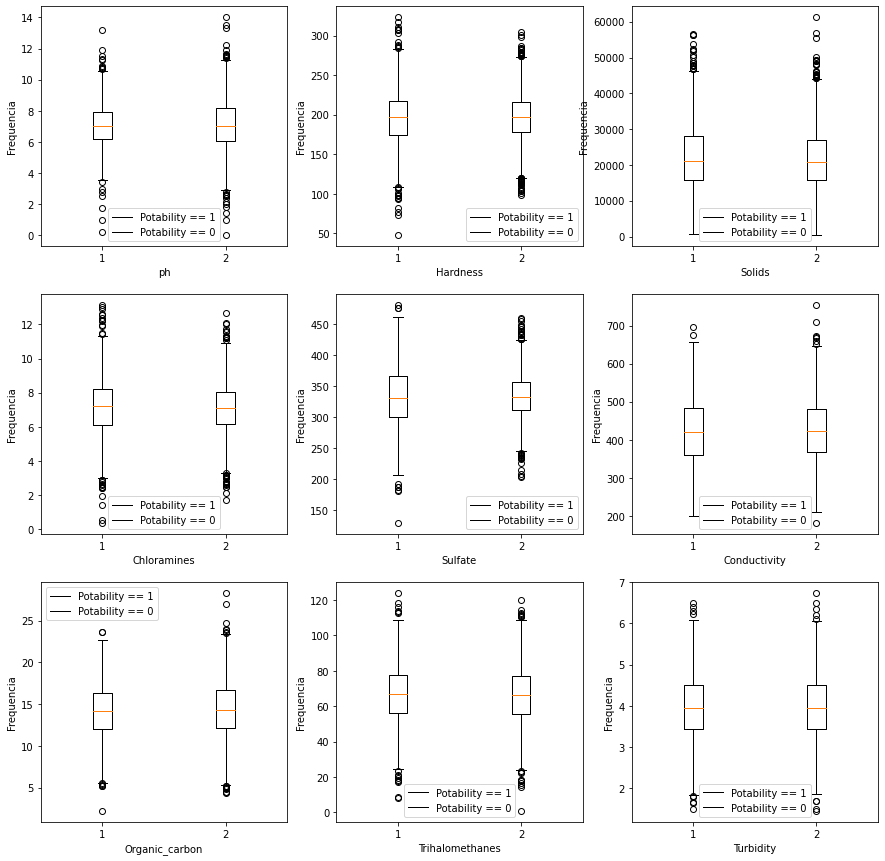

In [300]:
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua.loc[df_agua['Potability']==1][i].dropna(), df_agua.loc[df_agua['Potability']==0][i].dropna()])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [301]:
Q1 = df_agua.quantile(0.25)
Q3 = df_agua.quantile(0.75)
IQR = Q3 - Q1
Outliers = ((df_agua < (Q1 - 1.5 * IQR)) | (df_agua > (Q3 + 1.5 * IQR))).sum()
Outliers.sum()

366

# com Outliers

In [302]:
df_agua1 = df_agua.copy()
df_agua1_1 = df_agua1.loc[df_agua1['Potability'] == 1]
df_agua1_0 = df_agua1.loc[df_agua1['Potability'] == 0]
for i in list(df_agua):
    df_agua1.loc[df_agua1[i] == 1] = df_agua1.loc[df_agua1[i] == 1].fillna(df_agua1.loc[df_agua1[i] == 1].mean())
    df_agua1.loc[df_agua1[i] == 0] = df_agua1.loc[df_agua1[i] == 0].fillna(df_agua1.loc[df_agua1[i] == 0].mean())
df_agua1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# sem Outliers

In [303]:
df_agua1_Sout = df_agua1.copy()
for i in list(df_agua.columns)[:-1]:
    df_agua1_Sout = df_agua1_Sout[(df_agua1_Sout[i] >= (Q1[i] - 1.5 * IQR[i])) & (df_agua1_Sout[i] <= (Q3[i] + 1.5 * IQR[i]))]
df_agua1_Sout

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0


In [304]:
# verificando se faltam dados
df_agua1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [305]:
corr_ajustada = pd.DataFrame.from_dict({k: {i: df_agua1[k].corr(df_agua1[i]) for i in list(df_agua1)} for k in list(df_agua1)})
corr_ajustada

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


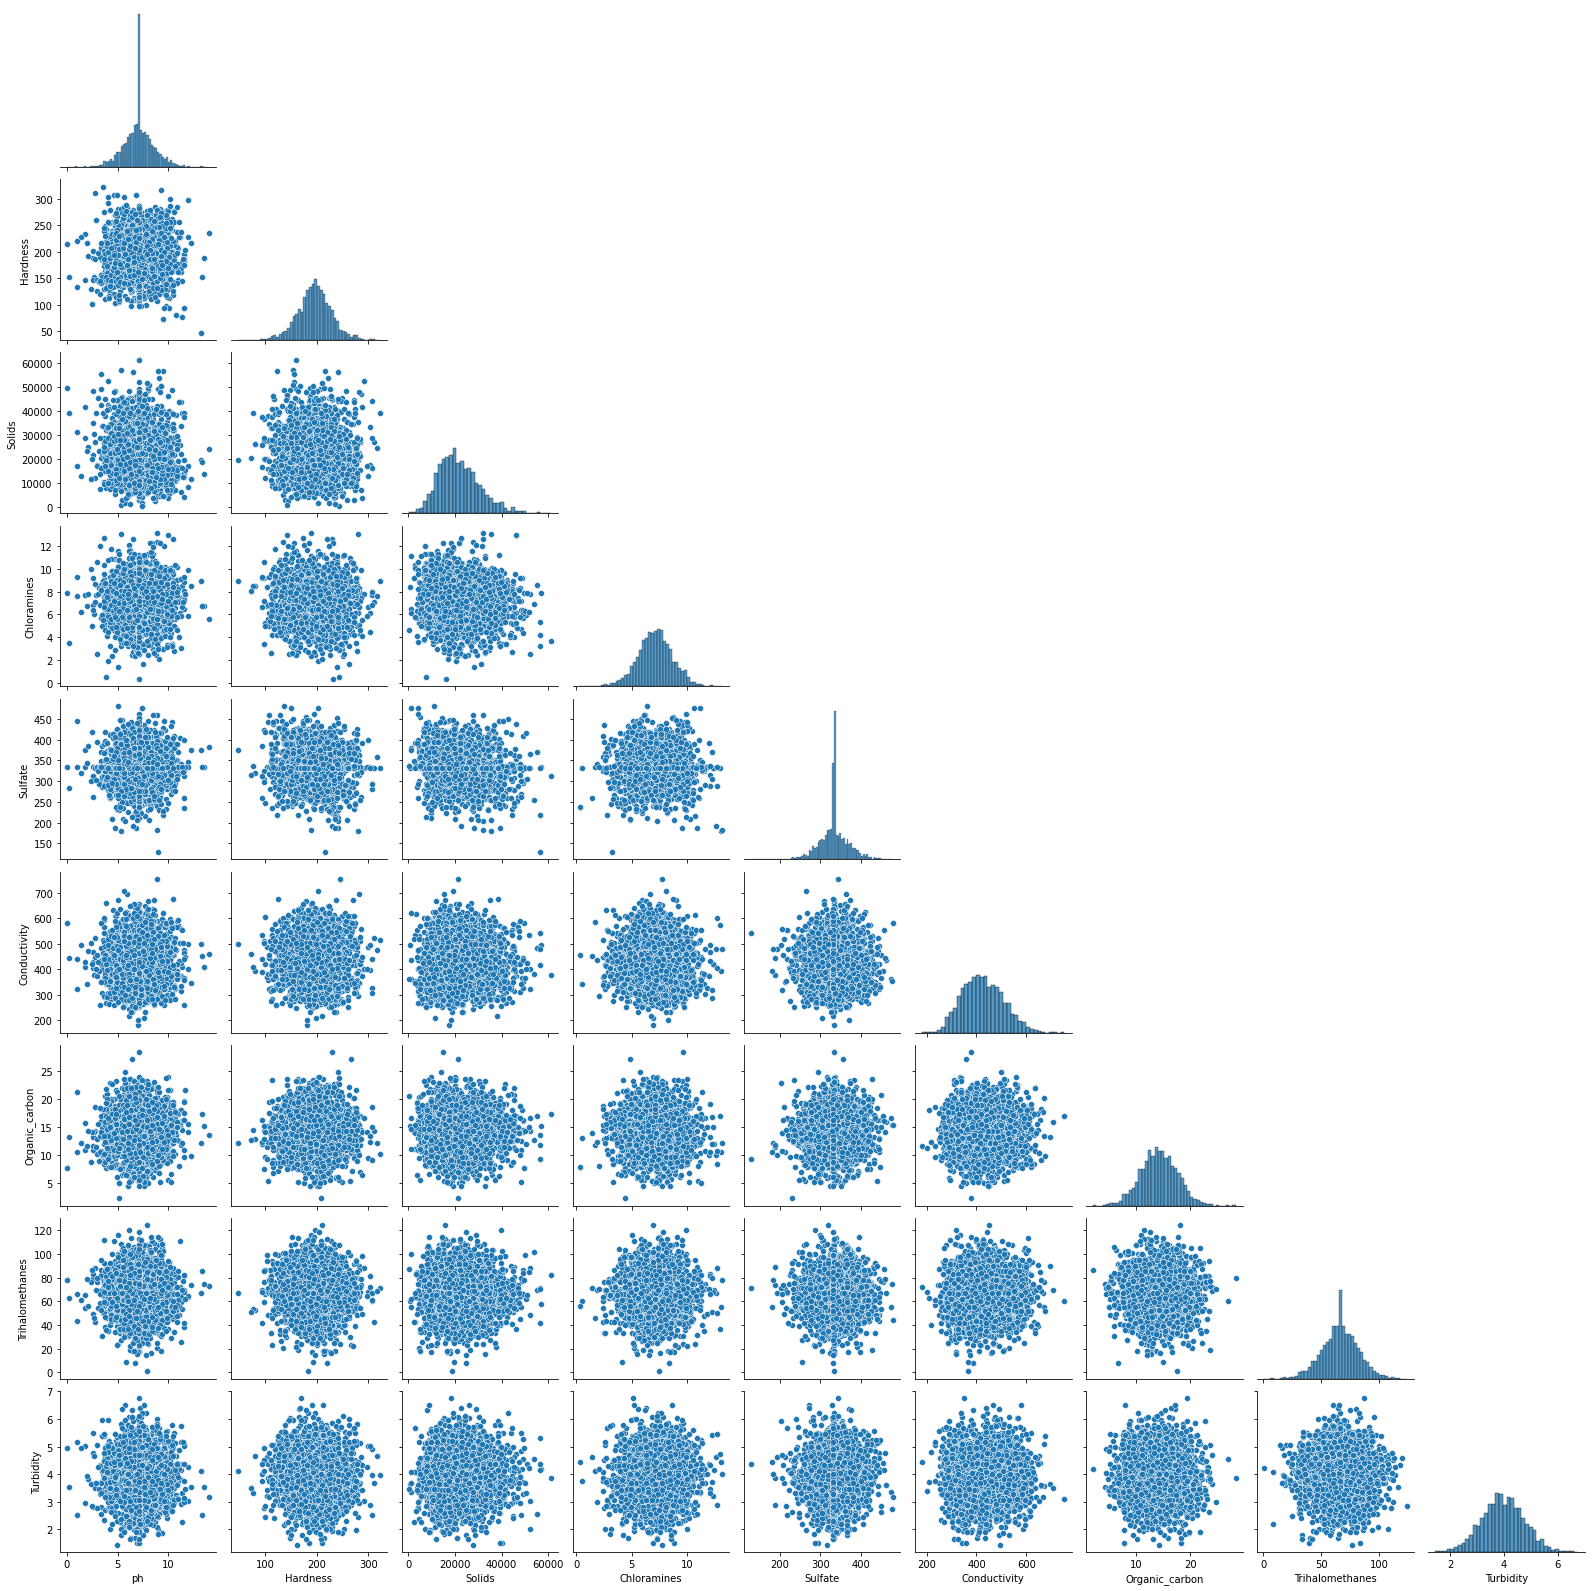

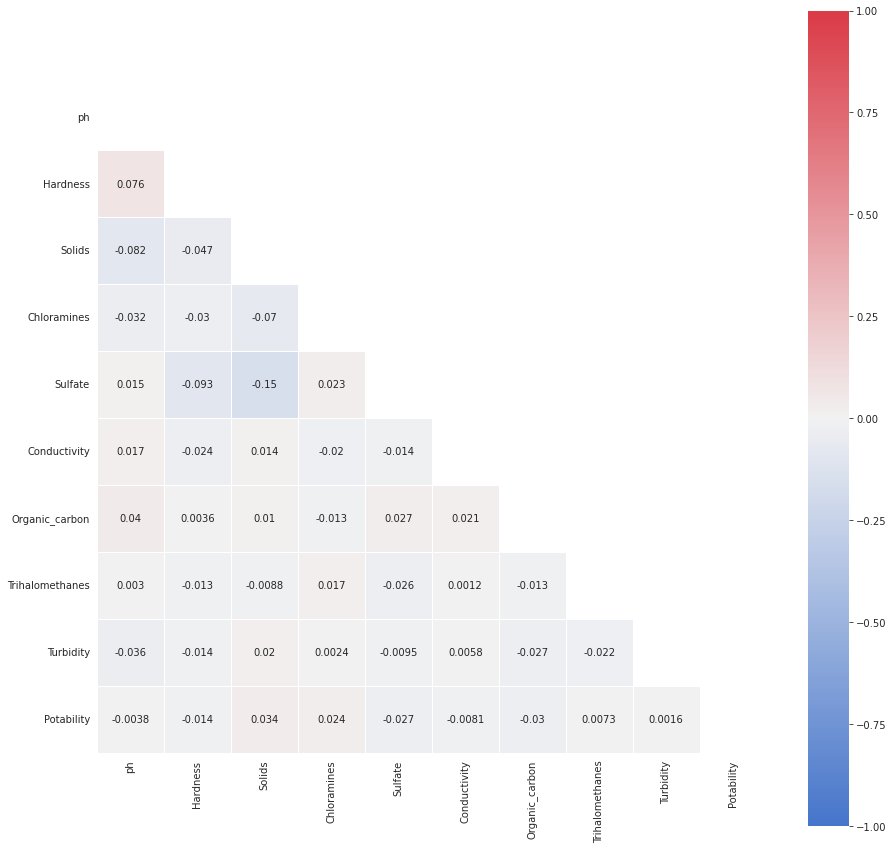

In [306]:
sns.pairplot(df_agua1[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']], corner=True)
plt.show(block=False)
mask = np.zeros_like(corr_ajustada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15), num='corr_ajustada sem pot')
    cmap = sns.diverging_palette(255, 10, as_cmap=True)
    sns.heatmap(corr_ajustada, vmin=-1, vmax=1, mask=mask, cmap=cmap, annot=True, square=True, linewidths=1)
plt.show(block=False)

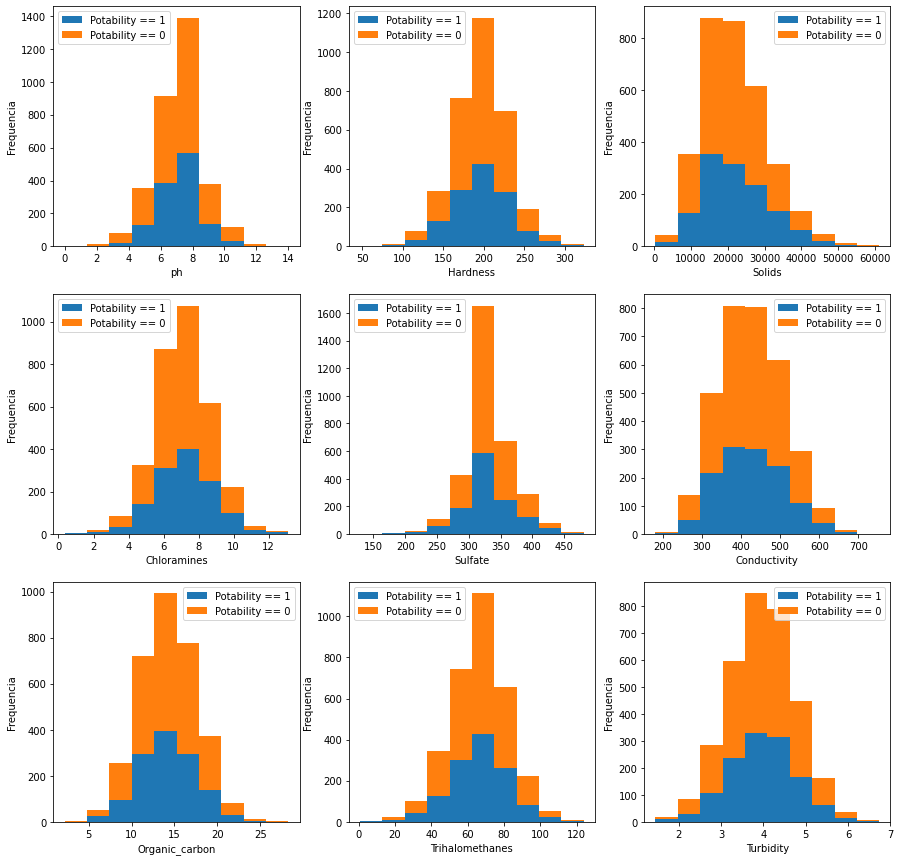

In [307]:
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.hist([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]], stacked=True)
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

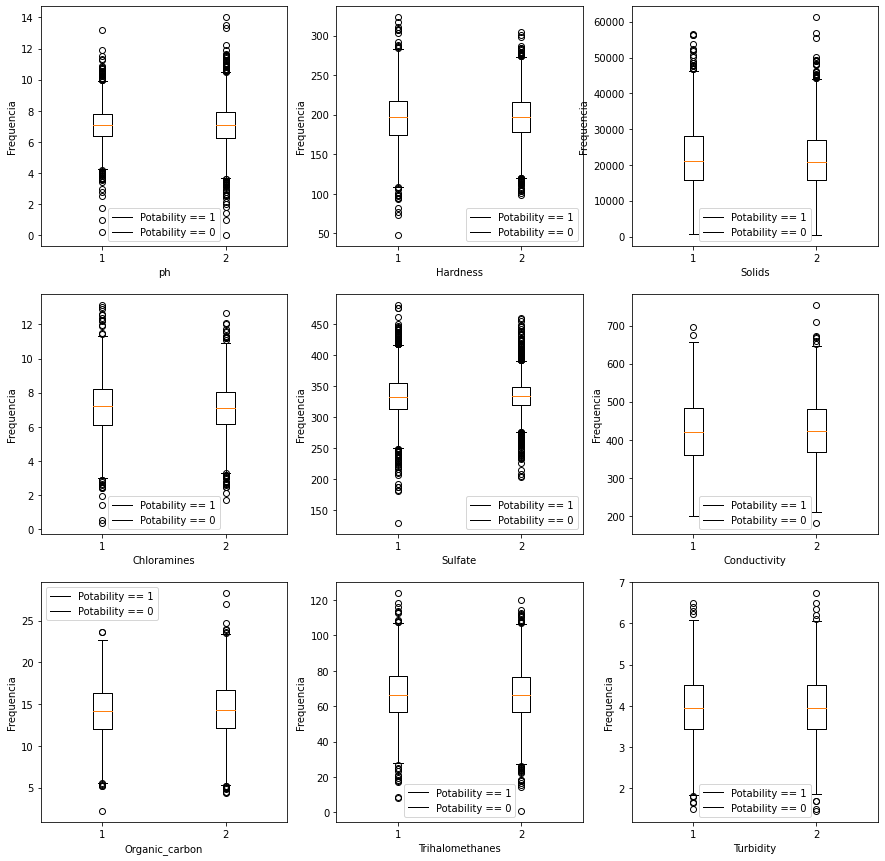

In [308]:
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [309]:
df_agua1.loc[df_agua1['Potability'] == 1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.343952,35.547041,9101.010208,1.702988,41.865385,82.048446,3.263907,15.971941,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.073783,196.632907,21199.386614,7.215163,332.566990,420.712729,14.162809,66.539684,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [310]:
df_agua1.loc[df_agua1['Potability'] == 0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.545489,31.057540,8543.068788,1.501045,31.941870,80.047317,3.334554,15.642622,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.085378,197.123423,20809.618280,7.090334,334.564290,422.229331,14.293508,66.303555,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


#  Iniciando modelos de regressão

# Exibir Dados

In [311]:
def metricas(tt_spit, lista_dados):
    arrays = [['Cout','Cout','Cout','Cout','Cout','Cout','Cout','Cout','Sout','Sout','Sout','Sout','Sout','Sout','Sout','Sout'],['Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste','Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste']]
    tuples = list(zip(*arrays))
    dic_ite = [[] for i in range(len(tt_spit[0]))]
    index = ['iteracao' + str(i+1) for i in range(len(tt_spit[0]))]
    columns = pd.MultiIndex.from_tuples(tuples)
    for j in range(len(tt_spit)):
        plt.figure(figsize=(20, 20), num=''.join('Cout' if j == 0 else 'Sout'))
        n=1
        acuracia_treino = [i[0][0] for i in lista_dados[j]]
        acuracia_teste = [i[0][1] for i in lista_dados[j]]
        predicao = [i[0][2] for i in lista_dados[j]]
        precision_treino = [i[1][0] for i in lista_dados[j]]
        precision_teste = [i[1][1] for i in lista_dados[j]]
        for i in range(len(tt_spit[j])):
            Train_X = tt_spit[j][i][0]; Test_X = tt_spit[j][i][1]; Train_Y = tt_spit[j][i][2]; Test_Y = tt_spit[j][i][3]
            Vn, Fp, Fn, Vp = cm(Test_Y, predicao[i]).ravel()
            dic_ite[i].append(Vp)
            dic_ite[i].append(Vn)
            dic_ite[i].append(Fp)
            dic_ite[i].append(Fn)
            dic_ite[i].append(acuracia_treino[i])
            dic_ite[i].append(acuracia_teste[i])
            dic_ite[i].append(precision_treino[i])
            dic_ite[i].append(precision_teste[i])
            plt.subplot(3, 4, n)
            mc = cm(Test_Y, predicao[i])
            cmap = sns.diverging_palette(255, 10, as_cmap=True)
            sns.heatmap(mc, cmap=cmap, annot=True, square=True, linewidths=1)
            plt.title(f'iteracao {n}\nacuracia {acuracia_teste[i]}')
            n+=1
        plt.subplot(3, 4, 12)
        plt.hist([round(i) for i in acuracia_teste])
        plt.xlabel('Acuracia')
        plt.ylabel('Frequencia')
        plt.show()
    df = pd.DataFrame(dic_ite, index=index, columns=columns)
    df[('Cout-Sout','acuracia_treino')] = df[('Cout','acuracia_treino')] - df[('Sout','acuracia_treino')]
    df[('Cout-Sout','acuracia_teste')] = df[('Cout','acuracia_teste')] - df[('Sout','acuracia_teste')]
    df[('Cout-Sout','precision_treino')] = df[('Cout','precision_treino')] - df[('Sout','precision_treino')]
    df[('Cout-Sout','precision_teste')] = df[('Cout','precision_teste')] - df[('Sout','precision_teste')]
    return df

# Random Forest Classifier

In [312]:
def RF_Clf(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_score = RF_clf.score(Train_X, Train_Y)*100
    RF_test_score = RF_clf.score(Test_X, Test_Y)*100
    RF_train_pred = RF_clf.predict(Train_X)
    RF_test_pred = RF_clf.predict(Test_X)
    RF_train_Recalscore = recall_score(Train_Y, RF_train_pred)*100
    RF_test_Recalscore = recall_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Recalscore, RF_test_Recalscore]]

# XGBoost Classifier

In [313]:
def XGB_Clf(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = GradientBoostingC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_score = XGB_clf.score(Train_X, Train_Y)*100
    XGB_test_score = XGB_clf.score(Test_X, Test_Y)*100
    XGB_train_pred = XGB_clf.predict(Train_X)
    XGB_test_pred = XGB_clf.predict(Test_X)
    XGB_train_Recalscore = recall_score(Train_Y, XGB_train_pred)*100
    XGB_test_Recalscore = recall_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_Recalscore, XGB_test_Recalscore]]

# Logistic Regression

In [314]:
def LogReg(Train_X, Test_X, Train_Y, Test_Y):
    Log_reg = Logit(Train_Y, Train_X).fit(disp=0)
    LR_train_pred = Log_reg.predict(Train_X)
    LR_test_pred = Log_reg.predict(Test_X)
    LR_train_precisionscore = precision_score(Train_Y, round(LR_train_pred))*100
    LR_test_precisionscore = precision_score(Test_Y, round(LR_test_pred))*100
    return [[accuracy_score(Train_Y, round(LR_train_pred))*100, accuracy_score(Test_Y, round(LR_test_pred))*100, round(LR_test_pred)], [LR_train_precisionscore, LR_test_precisionscore]]

# Neural Network

In [315]:
def my_neural_network(Train_X, Test_X, Train_Y, Test_Y, optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, epochs=50, batch_size=1, verbose=1):

    normalizer = StandardScaler().fit(Train_X)

    Train_X = normalizer.transform(Train_X)

    Test_X = normalizer.transform(Test_X)

    model = Sequential()

    model.add(Dense(units=16, activation='relu', input_shape=(9,)))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics, loss_weights=loss_weights, weighted_metrics=weighted_metrics, run_eagerly=run_eagerly, steps_per_execution=steps_per_execution)

    model.fit(Train_X, Train_Y, epochs=epochs, batch_size=batch_size, verbose=verbose)

    Predict_Y = model.predict(Test_X)
    score = model.evaluate(Test_X, Test_Y,verbose=1, return_dict=True)
    return score

# Rodando os classificadores

In [316]:
listaCout_tts = []; listaSout_tts = []; lista_tts = [[], []]; lista_RF = [[], []]; lista_XGB = [[], []]; lista_LR = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts[0].append(ttCout_split)
    lista_tts[1].append(ttSout_split)
    lista_RF[0].append(RF_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF[1].append(RF_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB[0].append(XGB_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB[1].append(XGB_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_LR[0].append(LogReg(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_LR[1].append(LogReg(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

# Random Forest

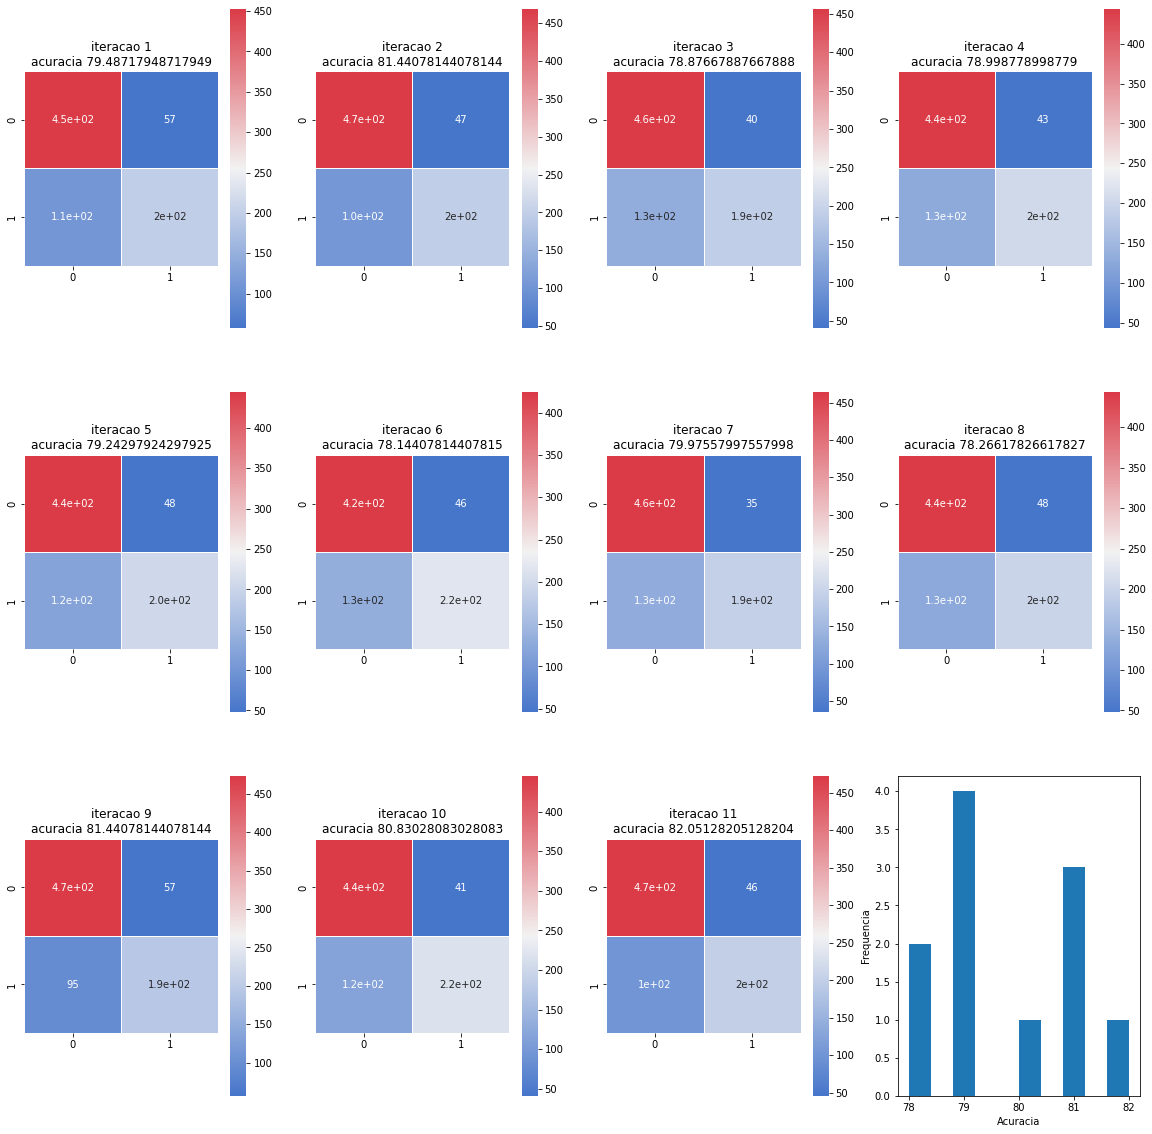

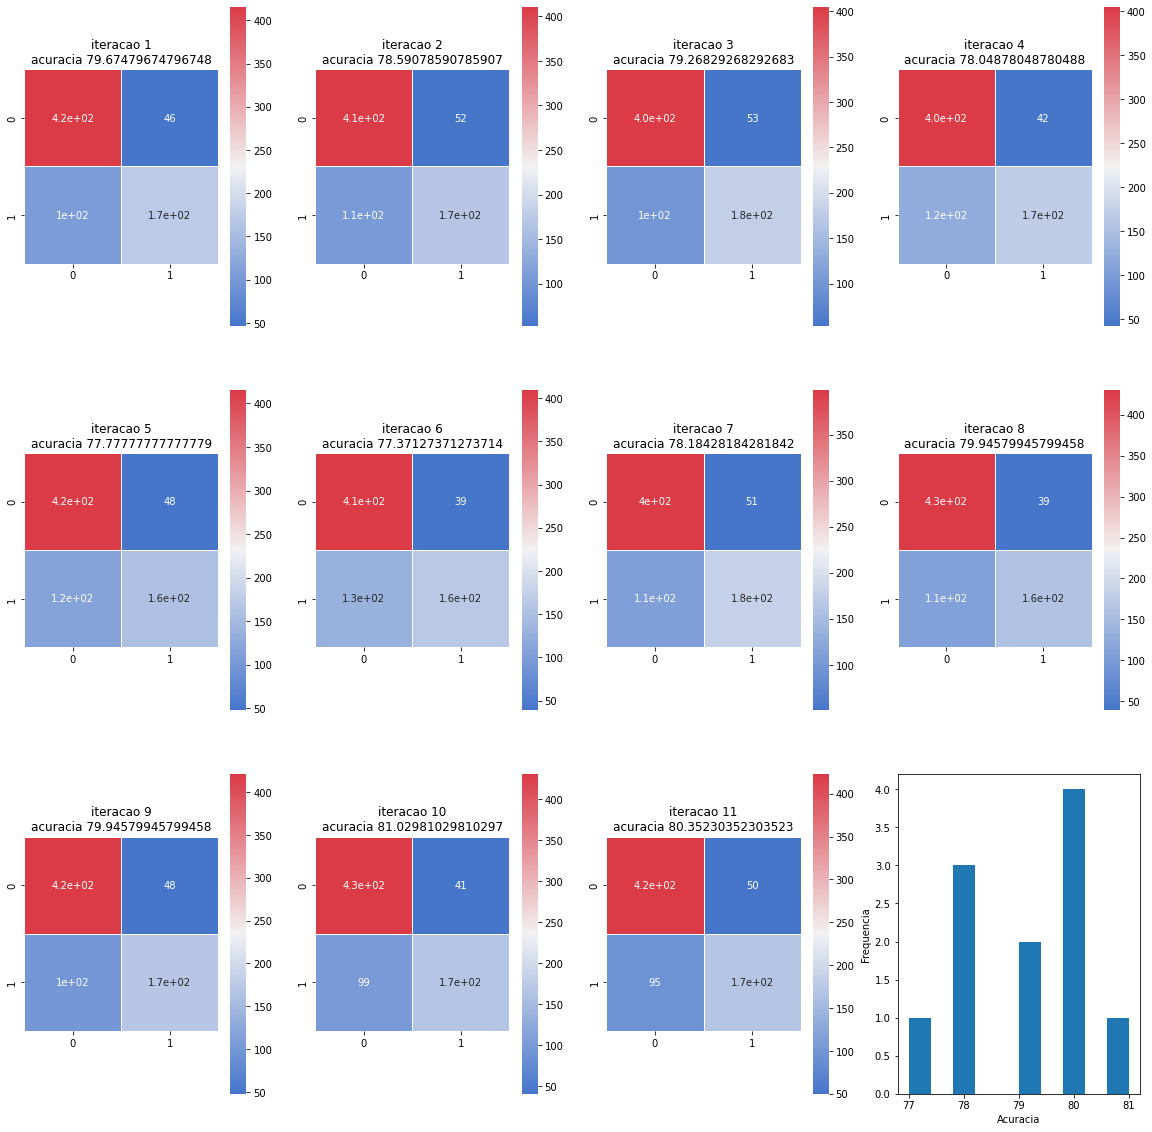

Cout                                                             \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste recall_treino   
iteracao1   198  453  57  111           100.0      79.487179         100.0   
iteracao2   198  469  47  105           100.0      81.440781         100.0   
iteracao3   189  457  40  133           100.0      78.876679         100.0   
iteracao4   203  444  43  129           100.0      78.998779         100.0   
iteracao5   205  444  48  122           100.0      79.242979         100.0   
iteracao6   216  424  46  133           100.0      78.144078         100.0   
iteracao7   191  464  35  129           100.0      79.975580         100.0   
iteracao8   198  443  48  130           100.0      78.266178         100.0   
iteracao9   194  473  57   95           100.0      81.440781         100.0   
iteracao10  217  445  41  116           100.0      80.830281         100.0   
iteracao11  200  472  46  101           100.0      82.051282         100.0   

                        Sout                                               \
           recall_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1     64.077670  172  416  46  104           100.0      79.674797   
iteracao2     65.346535  169  411  52  106           100.0      78.590786   
iteracao3     58.695652  180  405  53  100           100.0      79.268293   
iteracao4     61.144578  171  405  42  120           100.0      78.048780   
iteracao5     62.691131  159  415  48  116           100.0      77.777778   
iteracao6     61.891117  162  409  39  128           100.0      77.371274   
iteracao7     59.687500  179  398  51  110           100.0      78.184282   
iteracao8     60.365854  160  430  39  109           100.0      79.945799   
iteracao9     67.128028  169  421  48  100           100.0      79.945799   
iteracao10    65.165165  167  431  41   99           100.0      81.029810   
iteracao11    66.445183  170  423  50   95           100.0      80.352304   

                                            Cout-Sout                 \
           recall_treino recall_teste acuracia_treino acuracia_teste   
iteracao1          100.0    62.318841             0.0      -0.187617   
iteracao2          100.0    61.454545             0.0       2.849996   
iteracao3          100.0    64.285714             0.0      -0.391614   
iteracao4          100.0    58.762887             0.0       0.949999   
iteracao5          100.0    57.818182             0.0       1.465201   
iteracao6          100.0    55.862069             0.0       0.772804   
iteracao7          100.0    61.937716             0.0       1.791298   
iteracao8          100.0    59.479554             0.0      -1.679621   
iteracao9          100.0    62.825279             0.0       1.494982   
iteracao10         100.0    62.781955             0.0      -0.199529   
iteracao11         100.0    64.150943             0.0       1.698979   

                                       
           recall_treino recall_teste  
iteracao1            0.0     1.758829  
iteracao2            0.0     3.891989  
iteracao3            0.0    -5.590062  
iteracao4            0.0     2.381692  
iteracao5            0.0     4.872950  
iteracao6            0.0     6.029049  
iteracao7            0.0    -2.250216  
iteracao8            0.0     0.886300  
iteracao9            0.0     4.302749  
iteracao10           0.0     2.383210  
iteracao11           0.0     2.294239

In [317]:
metricas(lista_tts, lista_RF)

# XG_BOOST

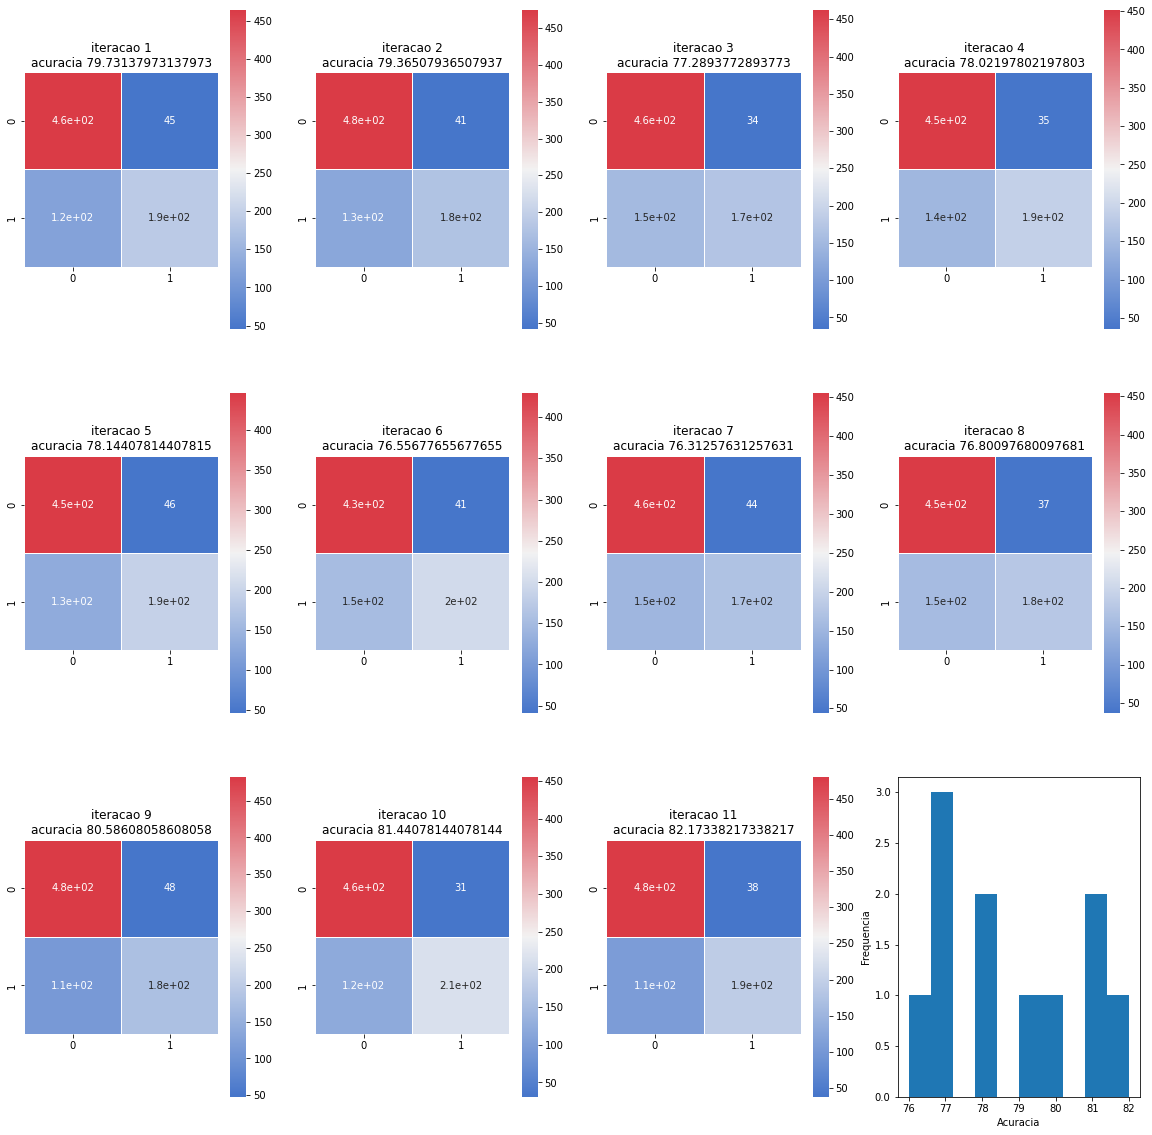

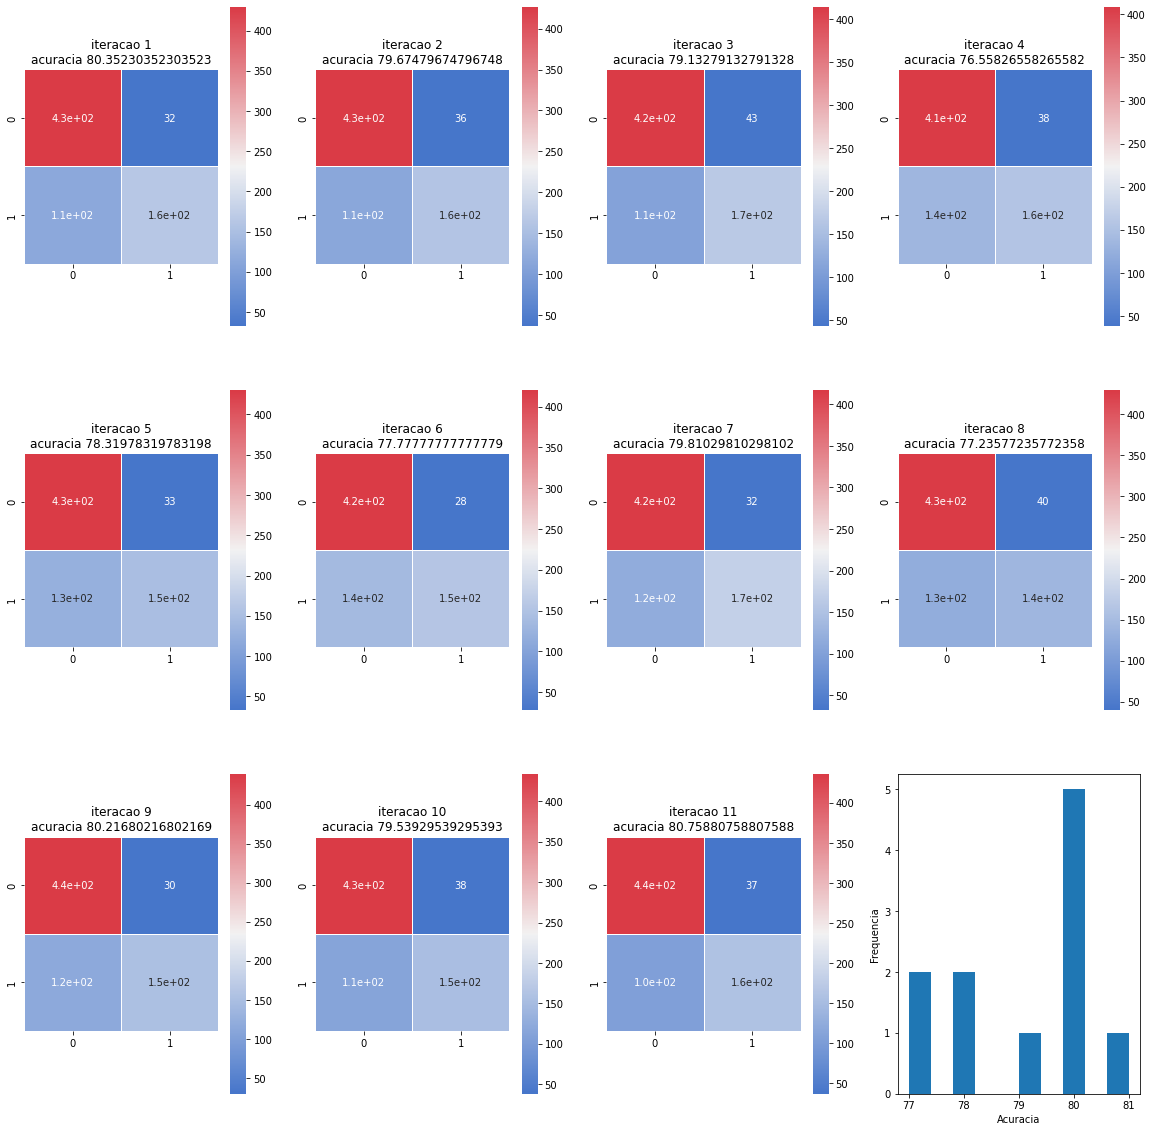

Cout                                                             \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste recall_treino   
iteracao1   188  465  45  121       86.324786      79.731380     71.001032   
iteracao2   175  475  41  128       85.714286      79.365079     68.717949   
iteracao3   170  463  34  152       85.551486      77.289377     67.887029   
iteracao4   187  452  35  145       85.999186      78.021978     68.393235   
iteracao5   194  446  46  133       85.429385      78.144078     68.664564   
iteracao6   198  429  41  151       86.039886      76.556777     67.599569   
iteracao7   170  455  44  150       85.551486      76.312576     67.223382   
iteracao8   175  454  37  153       86.772487      76.800977     70.315789   
iteracao9   178  482  48  111       84.574685      80.586081     67.441860   
iteracao10  212  455  31  121       85.551486      81.440781     66.243386   
iteracao11  193  480  38  108       84.818885      82.173382     68.577277   

                        Sout                                               \
           recall_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1     60.841424  163  430  32  113       86.579304      80.352304   
iteracao2     57.755776  161  427  36  114       85.585178      79.674797   
iteracao3     52.795031  169  415  43  111       86.217804      79.132791   
iteracao4     56.325301  156  409  38  135       86.534117      76.558266   
iteracao5     59.327217  148  430  33  127       87.618617      78.319783   
iteracao6     56.733524  154  420  28  136       86.262991      77.777778   
iteracao7     53.125000  172  417  32  117       86.127429      79.810298   
iteracao8     53.353659  141  429  40  128       85.449616      77.235772   
iteracao9     61.591696  153  439  30  116       86.985992      80.216802   
iteracao10    63.663664  153  434  38  113       86.172616      79.539295   
iteracao11    64.119601  160  436  37  105       86.669679      80.758808   

                                            Cout-Sout                 \
           recall_treino recall_teste acuracia_treino acuracia_teste   
iteracao1      68.860165    59.057971       -0.254518      -0.620924   
iteracao2      67.957746    58.545455        0.129107      -0.309717   
iteracao3      68.004723    60.357143       -0.666318      -1.843414   
iteracao4      68.062201    53.608247       -0.534931       1.463712   
iteracao5      71.244131    53.818182       -2.189232      -0.175705   
iteracao6      67.144564    53.103448       -0.223105      -1.221001   
iteracao7      65.990453    59.515571       -0.575943      -3.497722   
iteracao8      67.365967    52.416357        1.322871      -0.434796   
iteracao9      68.881119    56.877323       -2.411307       0.369278   
iteracao10     68.292683    57.518797       -0.621131       1.901486   
iteracao11     69.721578    60.377358       -1.850794       1.414575   

                                       
           recall_treino recall_teste  
iteracao1       2.140867     1.783453  
iteracao2       0.760202    -0.789679  
iteracao3      -0.117693    -7.562112  
iteracao4       0.331034     2.717054  
iteracao5      -2.579568     5.509035  
iteracao6       0.455006     3.630076  
iteracao7       1.232929    -6.390571  
iteracao8       2.949822     0.937302  
iteracao9      -1.439258     4.714372  
iteracao10     -2.049297     6.144867  
iteracao11     -1.144300     3.742243

In [318]:
metricas(lista_tts, lista_XGB)

# Logistic Regression

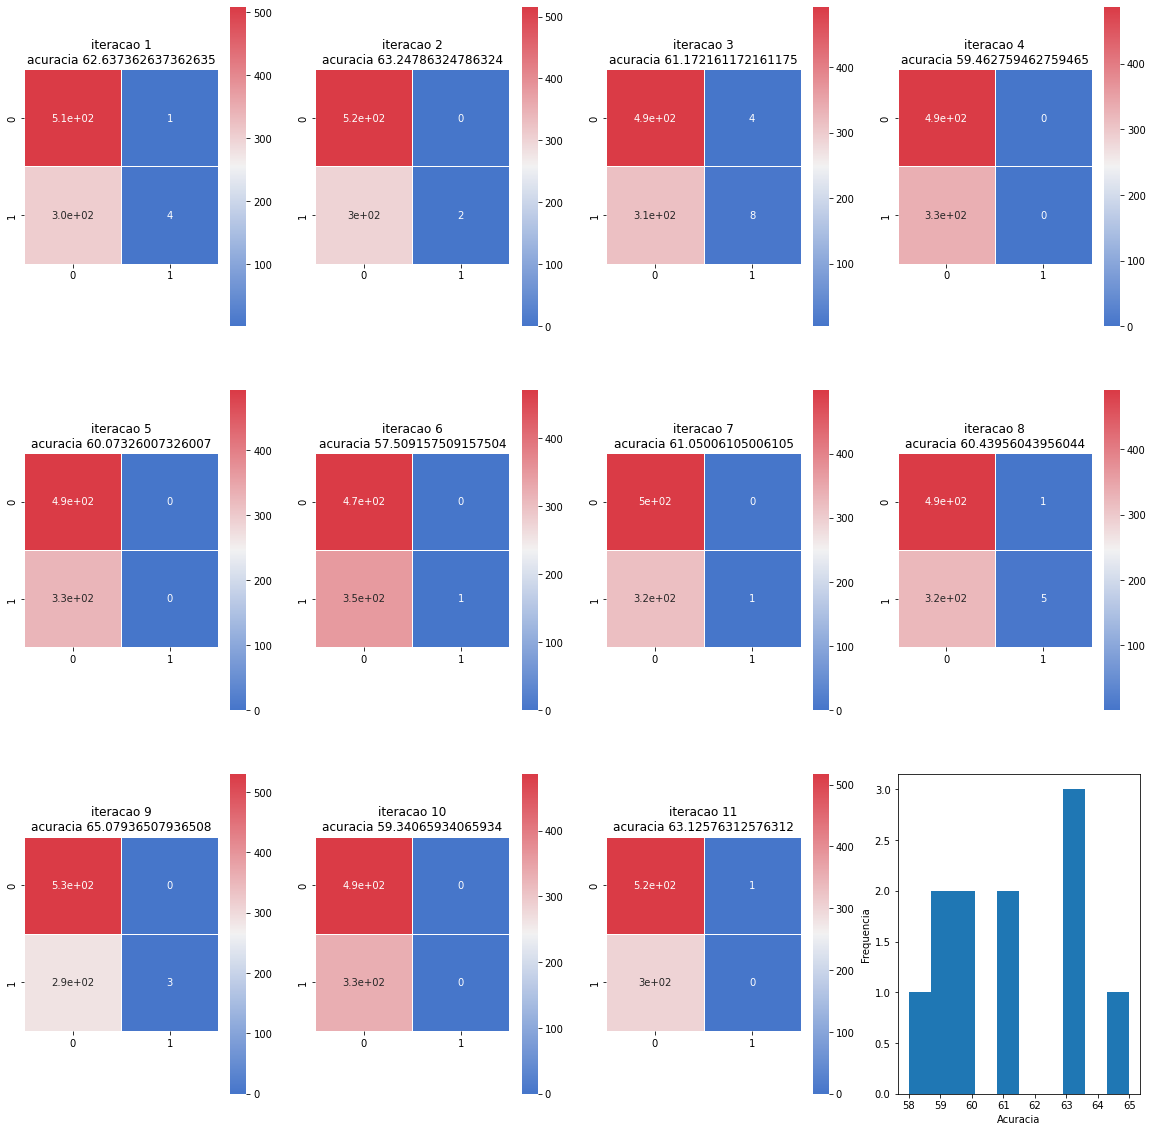

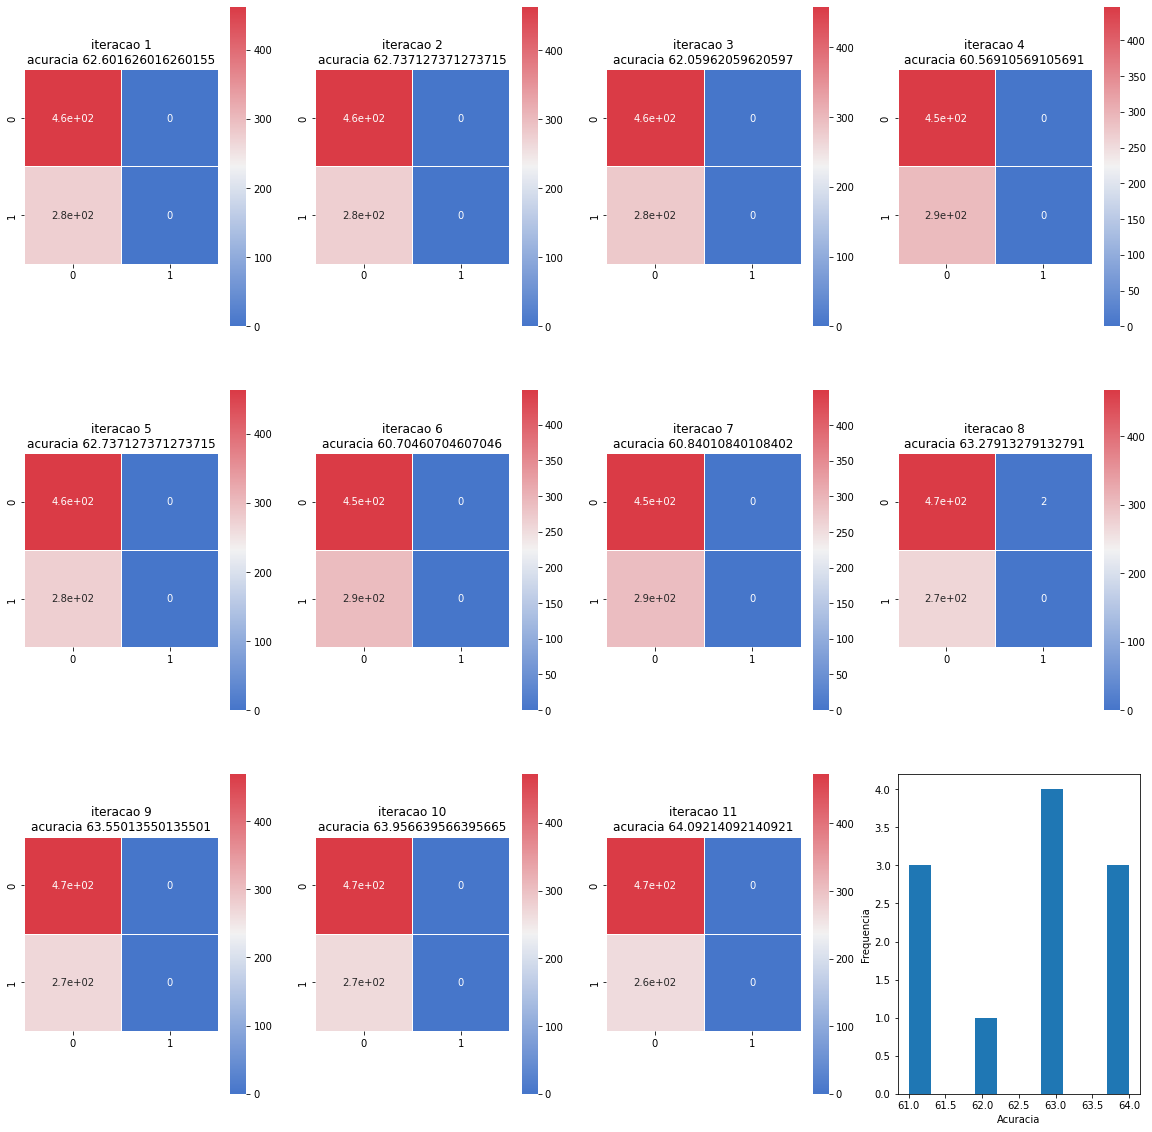

Cout                                                            \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste recall_treino   
iteracao1     4  509  1  305       60.927961      62.637363      1.444788   
iteracao2     2  516  0  301       60.398860      63.247863      0.307692   
iteracao3     8  493  4  314       62.393162      61.172161      4.079498   
iteracao4     0  487  0  332       61.457061      59.462759      0.000000   
iteracao5     0  492  0  327       61.294261      60.073260      0.000000   
iteracao6     1  470  0  348       62.311762      57.509158      0.322928   
iteracao7     1  499  0  319       61.294261      61.050061      0.730689   
iteracao8     5  490  1  323       61.579162      60.439560      0.736842   
iteracao9     3  530  0  286       60.032560      65.079365      0.707786   
iteracao10    0  486  0  333       61.782662      59.340659      0.634921   
iteracao11    0  517  1  301       60.480260      63.125763      0.716479   

                        Sout                                              \
           recall_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1      1.294498    0  462  0  276       61.545413      62.601626   
iteracao2      0.660066    0  463  0  275       61.500226      62.737127   
iteracao3      2.484472    0  458  0  280       61.726164      62.059621   
iteracao4      0.000000    0  447  0  291       62.223226      60.569106   
iteracao5      0.000000    0  463  0  275       61.590601      62.737127   
iteracao6      0.286533    0  448  0  290       62.178039      60.704607   
iteracao7      0.312500    0  449  0  289       62.132851      60.840108   
iteracao8      1.524390    0  467  2  269       61.635789      63.279133   
iteracao9      1.038062    0  469  0  269       61.229101      63.550136   
iteracao10     0.000000    0  472  0  266       61.183913      63.956640   
iteracao11     0.000000    0  473  0  265       61.048351      64.092141   

                                            Cout-Sout                 \
           recall_treino recall_teste acuracia_treino acuracia_teste   
iteracao1       0.000000          0.0       -0.617453       0.035737   
iteracao2       0.000000          0.0       -1.101366       0.510736   
iteracao3       0.000000          0.0        0.666999      -0.887459   
iteracao4       0.000000          0.0       -0.766165      -1.106346   
iteracao5       0.234742          0.0       -0.296340      -2.663867   
iteracao6       0.000000          0.0        0.133723      -3.195450   
iteracao7       0.000000          0.0       -0.838590       0.209953   
iteracao8       1.048951          0.0       -0.056627      -2.839572   
iteracao9       0.000000          0.0       -1.196541       1.529230   
iteracao10      0.232288          0.0        0.598749      -4.615980   
iteracao11      0.000000          0.0       -0.568090      -0.966378   

                                       
           recall_treino recall_teste  
iteracao1       1.444788     1.294498  
iteracao2       0.307692     0.660066  
iteracao3       4.079498     2.484472  
iteracao4       0.000000     0.000000  
iteracao5      -0.234742     0.000000  
iteracao6       0.322928     0.286533  
iteracao7       0.730689     0.312500  
iteracao8      -0.312109     1.524390  
iteracao9       0.707786     1.038062  
iteracao10      0.402633     0.000000  
iteracao11      0.716479     0.000000

In [319]:
metricas(lista_tts, lista_LR)

# Neural Network (Simulated only once)

# Com Outliers

In [320]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 1s 520us/step - loss: 0.6775 - accuracy: 0.6087
Epoch 2/50
2213/2213 [==============================] - 1s 521us/step - loss: 0.6578 - accuracy: 0.6227
Epoch 3/50
2213/2213 [==============================] - 1s 530us/step - loss: 0.6404 - accuracy: 0.6417
Epoch 4/50
2213/2213 [==============================] - 1s 528us/step - loss: 0.6330 - accuracy: 0.6566
Epoch 5/50
2213/2213 [==============================] - 1s 511us/step - loss: 0.6276 - accuracy: 0.6692
Epoch 6/50
2213/2213 [==============================] - 1s 532us/step - loss: 0.6251 - accuracy: 0.6706
Epoch 7/50
2213/2213 [==============================] - 1s 522us/step - loss: 0.6269 - accuracy: 0.6805
Epoch 8/50
2213/2213 [==============================] - 1s 531us/step - loss: 0.6272 - accuracy: 0.6846
Epoch 9/50
2213/2213 [==============================] - 1s 522us/step - loss: 0.6278 - accuracy: 0.6864
Epoch 10/50
2213/2213 [==============================] - 1s 505u

{'loss': 0.8547335863113403, 'accuracy': 0.6869918704032898}

# Sem Outliers

In [321]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 2s 540us/step - loss: 0.6782 - accuracy: 0.6001
Epoch 2/50
2213/2213 [==============================] - 1s 527us/step - loss: 0.6636 - accuracy: 0.6105
Epoch 3/50
2213/2213 [==============================] - 1s 549us/step - loss: 0.6563 - accuracy: 0.6146
Epoch 4/50
2213/2213 [==============================] - 1s 523us/step - loss: 0.6580 - accuracy: 0.6272
Epoch 5/50
2213/2213 [==============================] - 1s 521us/step - loss: 0.6563 - accuracy: 0.6281
Epoch 6/50
2213/2213 [==============================] - 1s 526us/step - loss: 0.6516 - accuracy: 0.6344
Epoch 7/50
2213/2213 [==============================] - 1s 533us/step - loss: 0.6410 - accuracy: 0.6606
Epoch 8/50
2213/2213 [==============================] - 1s 537us/step - loss: 0.6422 - accuracy: 0.6579
Epoch 9/50
2213/2213 [==============================] - 1s 551us/step - loss: 0.6351 - accuracy: 0.6733
Epoch 10/50
2213/2213 [==============================] - 1s 530u

{'loss': 0.8455836772918701, 'accuracy': 0.6056910753250122}

# Evitando Falsos Positivos

# Random Forest

In [322]:
def RF_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_predicted_proba = RF_clf.predict_proba(Train_X)
    RF_train_pred = (RF_train_predicted_proba [:,1] >= 0.8).astype('int')
    RF_test_predicted_proba = RF_clf.predict_proba(Test_X)
    RF_test_pred = (RF_test_predicted_proba [:,1] >= 0.8).astype('int')
    RF_train_score = accuracy_score(Train_Y, RF_train_pred)*100
    RF_train_Precisionscore = precision_score(Train_Y, RF_train_pred)*100
    RF_test_score = accuracy_score(Test_Y, RF_test_pred)*100
    RF_test_Precisionscore = precision_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Precisionscore, RF_test_Precisionscore]]

# XG_BOOST

In [323]:
def XGB_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = RandomForestC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_predicted_proba = XGB_clf.predict_proba(Train_X)
    XGB_train_pred = (XGB_train_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_test_predicted_proba = XGB_clf.predict_proba(Test_X)
    XGB_test_pred = (XGB_test_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_train_score = accuracy_score(Train_Y, XGB_train_pred)*100
    XGB_train_Precisionscore = precision_score(Train_Y, XGB_train_pred)*100
    XGB_test_score = accuracy_score(Test_Y, XGB_test_pred)*100
    XGB_test_Precisionscore = precision_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_Precisionscore, XGB_test_Precisionscore]]

# Rodando os classificadores

In [324]:
listaCout_tts = []; listaSout_tts = []; lista_tts = [[], []]; lista_RF = [[], []]; lista_XGB = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts[0].append(ttCout_split)
    lista_tts[1].append(ttSout_split)
    lista_RF[0].append(RF_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF[1].append(RF_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB[0].append(XGB_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB[1].append(XGB_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

# Random Fores

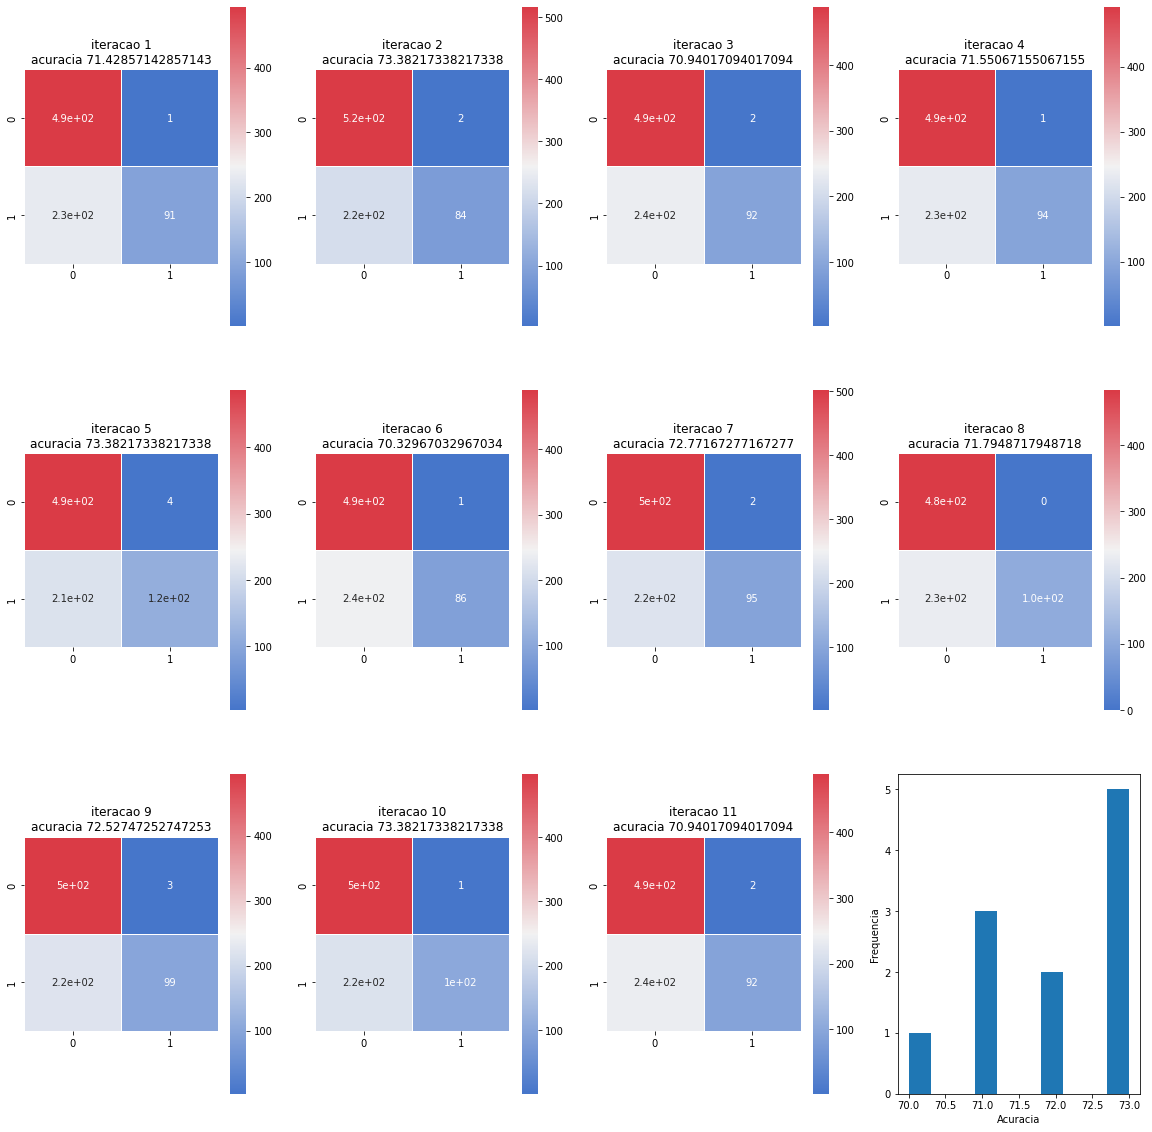

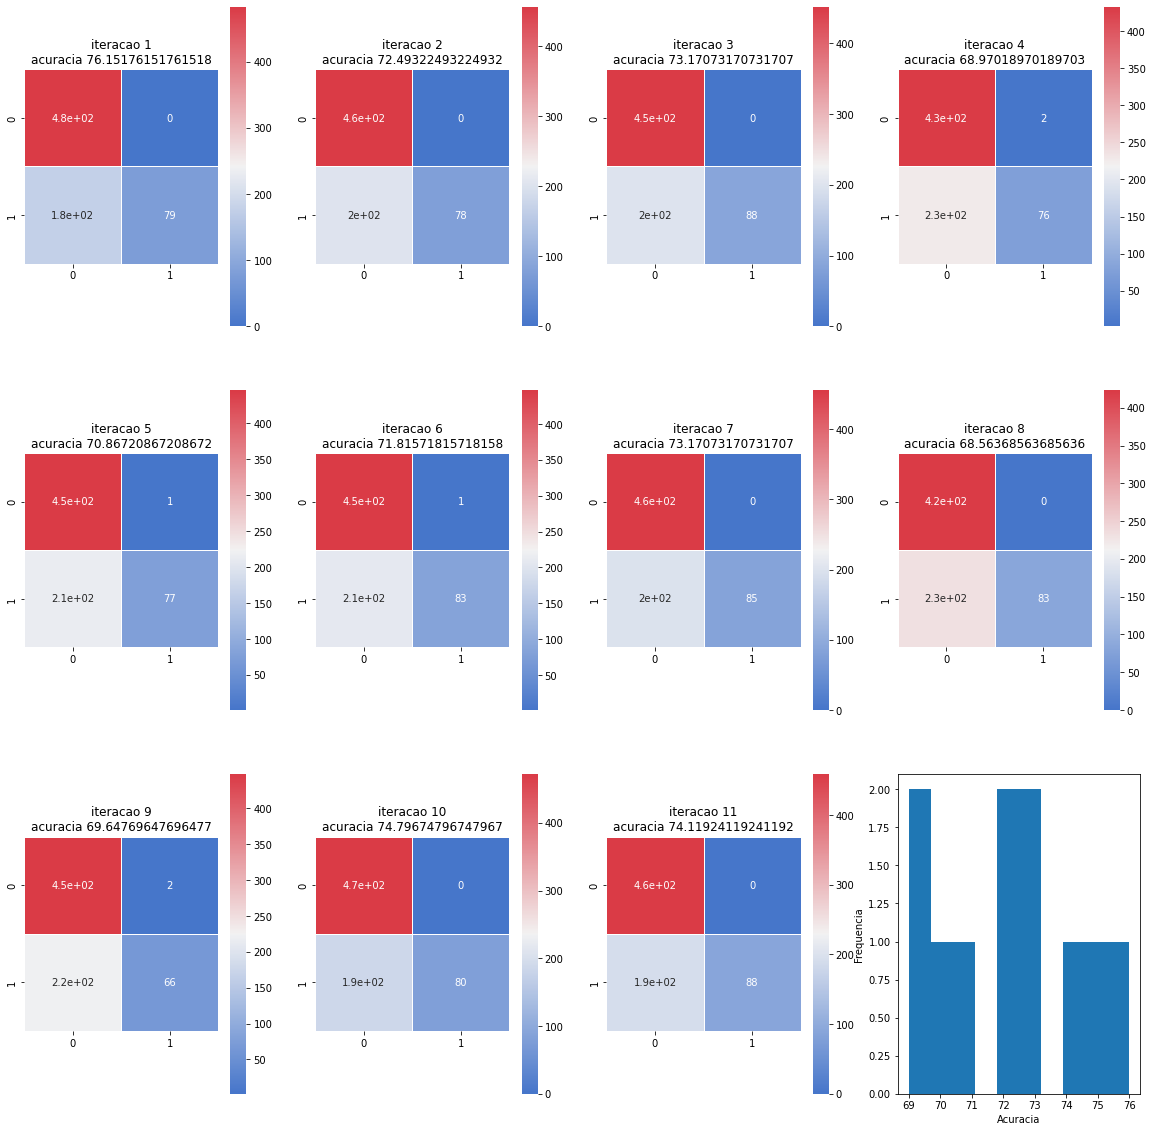

Cout                                                            \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste recall_treino   
iteracao1    91  494  1  233       89.377289      71.428571         100.0   
iteracao2    84  517  2  216       88.888889      73.382173         100.0   
iteracao3    92  489  2  236       88.481888      70.940171         100.0   
iteracao4    94  492  1  232       88.644689      71.550672         100.0   
iteracao5   115  486  4  214       88.848189      73.382173         100.0   
iteracao6    86  490  1  242       88.156288      70.329670         100.0   
iteracao7    95  501  2  221       88.888889      72.771673         100.0   
iteracao8   105  483  0  231       88.400488      71.794872         100.0   
iteracao9    99  495  3  222       88.400488      72.527473         100.0   
iteracao10  103  498  1  217       89.092389      73.382173         100.0   
iteracao11   92  489  2  236       88.726089      70.940171         100.0   

                        Sout                                              \
           recall_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1     98.913043   79  483  0  176       88.386805      76.151762   
iteracao2     97.674419   78  457  0  203       88.341618      72.493225   
iteracao3     97.872340   88  452  0  198       88.883868      73.170732   
iteracao4     98.947368   76  433  2  227       88.431993      68.970190   
iteracao5     96.638655   77  446  1  214       88.612743      70.867209   
iteracao6     98.850575   83  447  1  207       88.477180      71.815718   
iteracao7     97.938144   85  455  0  198       88.748305      73.170732   
iteracao8    100.000000   83  423  0  232       87.799367      68.563686   
iteracao9     97.058824   66  448  2  222       88.115680      69.647696   
iteracao10    99.038462   80  472  0  186       88.386805      74.796748   
iteracao11    97.872340   88  459  0  191       87.708992      74.119241   

                                            Cout-Sout                 \
           recall_treino recall_teste acuracia_treino acuracia_teste   
iteracao1          100.0   100.000000        0.990484      -4.723190   
iteracao2          100.0   100.000000        0.547271       0.888948   
iteracao3          100.0   100.000000       -0.401980      -2.230561   
iteracao4          100.0    97.435897        0.212696       2.580482   
iteracao5          100.0    98.717949        0.235446       2.514965   
iteracao6          100.0    98.809524       -0.320892      -1.486048   
iteracao7          100.0   100.000000        0.140583      -0.399059   
iteracao8          100.0   100.000000        0.601121       3.231186   
iteracao9          100.0    97.058824        0.284808       2.879776   
iteracao10         100.0   100.000000        0.705584      -1.414575   
iteracao11         100.0   100.000000        1.017096      -3.179070   

                                       
           recall_treino recall_teste  
iteracao1            0.0    -1.086957  
iteracao2            0.0    -2.325581  
iteracao3            0.0    -2.127660  
iteracao4            0.0     1.511471  
iteracao5            0.0    -2.079293  
iteracao6            0.0     0.041051  
iteracao7            0.0    -2.061856  
iteracao8            0.0     0.000000  
iteracao9            0.0     0.000000  
iteracao10           0.0    -0.961538  
iteracao11           0.0    -2.127660

In [325]:
metricas(lista_tts, lista_RF)

# XG_BOOST

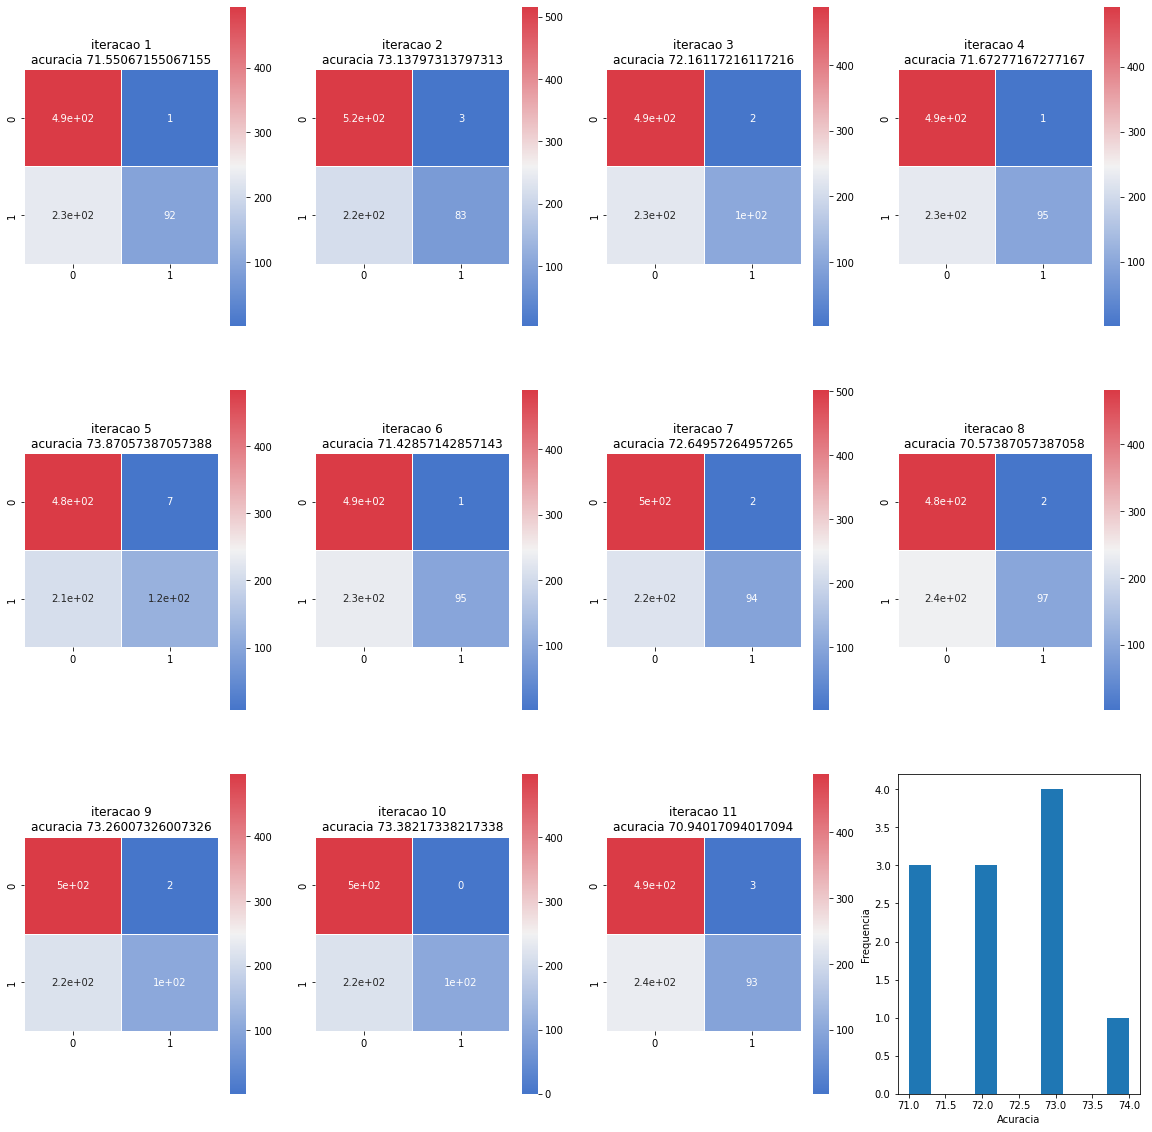

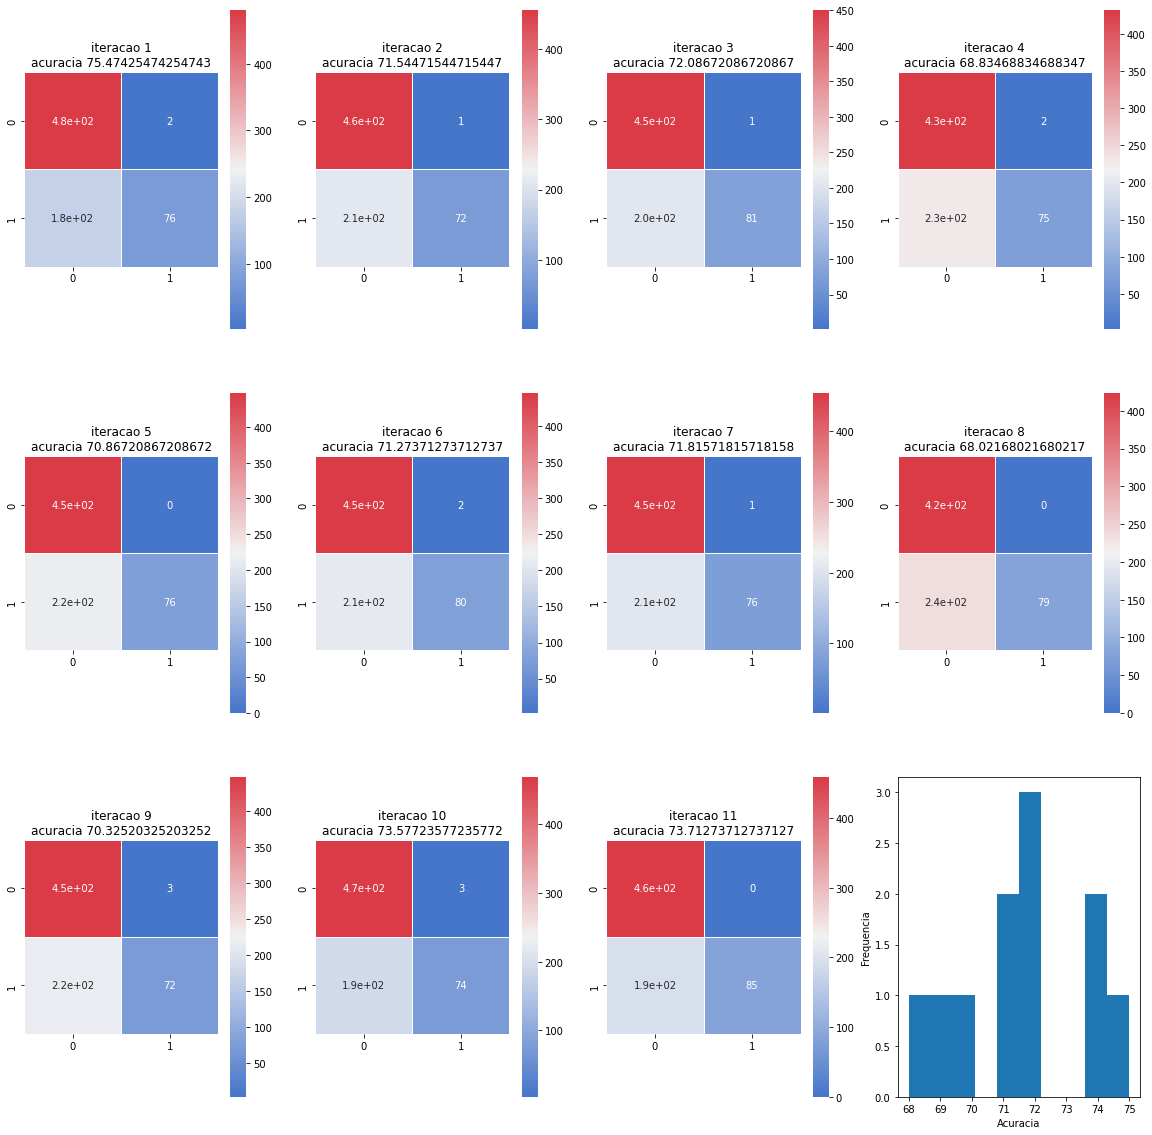

Cout                                                            \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste recall_treino   
iteracao1    92  494  1  232       89.133089      71.550672         100.0   
iteracao2    83  516  3  217       89.051689      73.137973         100.0   
iteracao3   102  489  2  226       89.417989      72.161172         100.0   
iteracao4    95  492  1  231       88.644689      71.672772         100.0   
iteracao5   122  483  7  207       88.726089      73.870574         100.0   
iteracao6    95  490  1  233       88.156288      71.428571         100.0   
iteracao7    94  501  2  222       88.441188      72.649573         100.0   
iteracao8    97  481  2  239       89.092389      70.573871         100.0   
iteracao9   104  496  2  217       88.196988      73.260073         100.0   
iteracao10  102  499  0  218       88.441188      73.382173         100.0   
iteracao11   93  488  3  235       88.644689      70.940171         100.0   

                        Sout                                              \
           recall_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1     98.924731   76  481  2  179       88.477180      75.474255   
iteracao2     96.511628   72  456  1  209       88.431993      71.544715   
iteracao3     98.076923   81  451  1  205       88.838681      72.086721   
iteracao4     98.958333   75  433  2  228       87.934930      68.834688   
iteracao5     94.573643   76  447  0  215       87.799367      70.867209   
iteracao6     98.958333   80  446  2  210       88.160868      71.273713   
iteracao7     97.916667   76  454  1  207       88.612743      71.815718   
iteracao8     97.979798   79  423  0  236       88.657930      68.021680   
iteracao9     98.113208   72  447  3  216       88.974243      70.325203   
iteracao10   100.000000   74  469  3  192       87.618617      73.577236   
iteracao11    96.875000   85  459  0  194       88.206055      73.712737   

                                            Cout-Sout                 \
           recall_treino recall_teste acuracia_treino acuracia_teste   
iteracao1          100.0    97.435897        0.655909      -3.923583   
iteracao2          100.0    98.630137        0.619696       1.593258   
iteracao3          100.0    98.780488        0.579309       0.074451   
iteracao4          100.0    97.402597        0.709759       2.838083   
iteracao5          100.0   100.000000        0.926721       3.003365   
iteracao6          100.0    97.560976       -0.004579       0.154859   
iteracao7          100.0    98.701299       -0.171554       0.833854   
iteracao8          100.0   100.000000        0.434459       2.552190   
iteracao9          100.0    96.000000       -0.777255       2.934870   
iteracao10         100.0    96.103896        0.822571      -0.195062   
iteracao11         100.0   100.000000        0.438634      -2.772566   

                                       
           recall_treino recall_teste  
iteracao1            0.0     1.488834  
iteracao2            0.0    -2.118509  
iteracao3            0.0    -0.703565  
iteracao4            0.0     1.555736  
iteracao5            0.0    -5.426357  
iteracao6            0.0     1.397358  
iteracao7            0.0    -0.784632  
iteracao8            0.0    -2.020202  
iteracao9            0.0     2.113208  
iteracao10           0.0     3.896104  
iteracao11           0.0    -3.125000

In [326]:
metricas(lista_tts, lista_XGB)